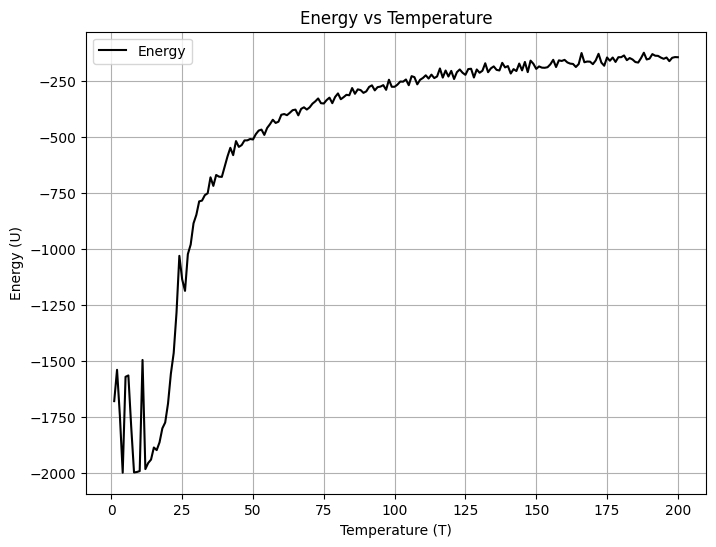

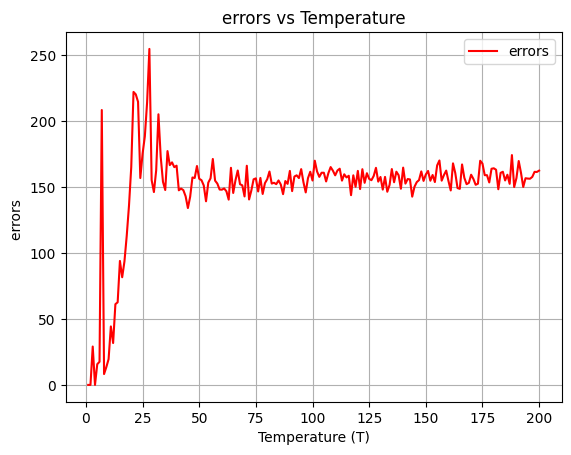

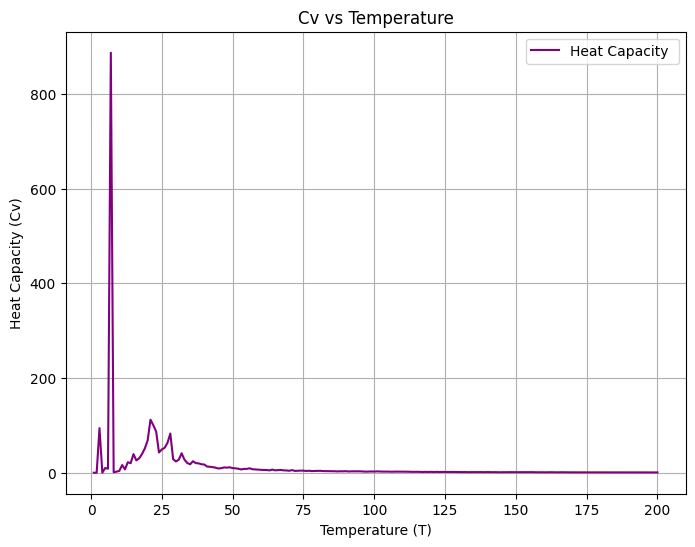

In [ ]:
##מודל איזינג##
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from scipy.interpolate import CubicSpline
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
##פונקציות עזר!!!!!!!!!!!

def calculate_energy_1(G, J, H):
    N = G.shape[0]
    energy = 0

    for i in range(N):
        for j in range(N):
            s_ij = G[i, j]
            if i < N - 1:
                energy += s_ij * G[i + 1, j]
            if j < N - 1:
                energy += s_ij * G[i, j + 1]
    total_energy = +J * energy + H * np.sum(G)
    return total_energy
def local_energy_1(n, m, G, J, H):
    N = G.shape[0]
    s_nm = G[n, m]
    neighbors = []
    if n + 1 < N: neighbors.append(G[n + 1, m])
    if n - 1 >= 0: neighbors.append(G[n - 1, m])
    if m + 1 < N: neighbors.append(G[n, m + 1])
    if m - 1 >= 0: neighbors.append(G[n, m - 1])
    E_local = J * s_nm * sum(neighbors) + H * s_nm
    return E_local
def local_energy(n, m, G, J, H):
    N = G.shape[0]
    s_nm = G[n, m]

    neighbors = [
        G[(n + 1) % N, m],
        G[(n - 1) % N, m],
        G[n, (m + 1) % N],
        G[n, (m - 1) % N]
    ]

    E_local = J * s_nm * sum(neighbors) + H * s_nm
    return E_local

import numpy as np

def calculate_energy(G, J, H):
    N = G.shape[0]
    energy = 0

    for i in range(N):
        for j in range(N):
            s_ij = G[i, j]

            energy += s_ij * G[(i + 1) % N, j]
            energy += s_ij * G[i, (j + 1) % N]

    total_energy = J * energy + H * np.sum(G)
    return total_energy


def plot_spin_matrix(G):
    plt.figure(figsize=(6,6))
    plt.imshow(G, cmap='gray', vmin=-1, vmax=1)
    plt.xticks([])
    plt.yticks([])
    plt.title("Spin Configuration")
    plt.show()

def spin_matrix(N, J, H, T,steps):
    G = np.random.choice([-1, 1], size=(N, N))
    for _ in range(steps):
      n, m = np.random.randint(0, N), np.random.randint(0, N)
      E0 = local_energy(n, m, G, J, H)
      G[n, m] *= -1
      E1 = local_energy(n, m, G, J, H)
      delta_E = E1 - E0
      p = np.random.rand()
      if p> np.exp(-delta_E/T):
        G[n, m] *= -1
    return G



def magnetizaicion_of_matrix(G):
  N = G.shape[0]
  M = -np.sum(G) / (N * N)
  return M
def vec_magnetization(N, J, H, T, steps, avg_steps):
    G = spin_matrix(N, J, H, T, steps)
    mag_values = []
    for _ in range(avg_steps):
        mag_values.append(magnetizaicion_of_matrix(G))
        n, m = np.random.randint(0, N), np.random.randint(0, N)
        E0 = local_energy(n, m, G, J, H)
        G[n, m] *= -1
        E1 = local_energy(n, m, G, J, H)
        delta_E = E1 - E0
        p = np.random.rand()
        if p> np.exp(-delta_E/T):
         G[n, m] *= -1
    return mag_values

def M_vs_T(N, J, H, T_values, steps, avg_steps):
    magnetizations = []
    errors = []

    for T in T_values:
        if T == 0:
            M = 1
            error = 0
        else:
            VM=vec_magnetization(N, J, H, T, steps, avg_steps)
            M = np.mean(VM)
            error = np.std(VM)

        magnetizations.append((M))
        errors.append(error)



    plt.figure(figsize=(8,6))

    plt.plot(T_values, magnetizations, linestyle='solid', color='black', label="Magnetization")

    plt.xlabel("Temperature (T)")
    plt.ylabel("Magnetization (M)")
    plt.title("Magnetization vs Temperature")
    plt.legend()
    plt.grid()
    plt.show()
    plt.figure(figsize=(8,6))

    # גרף של המגנטיזציה
    plt.plot(T_values, errors, linestyle='solid', color='red', label="Magnetization")
    plt.xlabel("Temperature (T)")
    plt.ylabel("error ")
    plt.title("error vs Temperature")
    plt.legend()
    plt.grid()
    plt.show()


def vec_energy(N, J, H, T, steps, avg_steps):
    G = spin_matrix(N, J, H, T, steps)
    eng_values = []
    for _ in range(avg_steps):
        eng_values.append(calculate_energy(G, J, H))
        n, m = np.random.randint(0, N), np.random.randint(0, N)
        E0 = local_energy(n, m, G, J, H)
        G[n, m] *= -1
        E1 = local_energy(n, m, G, J, H)
        delta_E = E1 - E0
        p = np.random.rand()
        if p> np.exp(-delta_E/T):
         G[n, m] *= -1
    return eng_values
def U_vs_T(N, J, H, T_values, steps, avg_steps):
    U = []
    errors = []
    Cv= []

    for T in T_values:
        UV=vec_energy(N, J, H, T, steps, avg_steps)
        mean_U = np.mean(UV)
        error_U = np.std(UV)
        U.append(mean_U)
        errors.append(error_U)
        Cv.append((np.var(UV,ddof=1)/((T**2))))





    plt.figure(figsize=(8,6))
    plt.plot(T_values, U, linestyle='solid', color='black', label="Energy")
    plt.xlabel("Temperature (T)")
    plt.ylabel("Energy (U)")
    plt.title("Energy vs Temperature")
    plt.legend()
    plt.grid()
    plt.show()


    plt.plot(T_values, errors, linestyle='solid', color='red', label="errors")
    plt.xlabel("Temperature (T)")
    plt.ylabel("errors ")
    plt.title("errors vs Temperature")
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(T_values, Cv, linestyle='solid', color='purple', label="Heat Capacity ")
    plt.xlabel("Temperature (T)")
    plt.ylabel("Heat Capacity (Cv)")
    plt.title("Cv vs Temperature")
    plt.legend()
    plt.grid(True)
    plt.show()



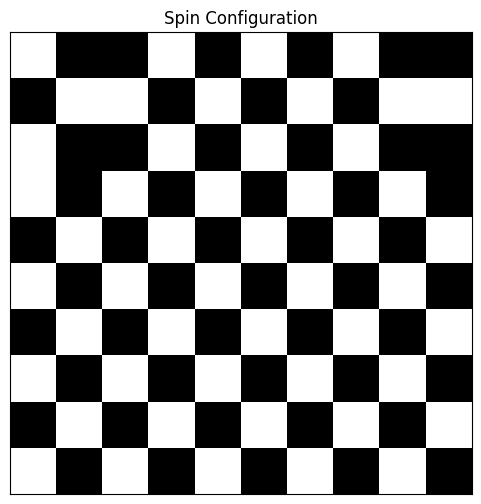

In [ ]:
 plot_spin_matrix(spin_matrix(10, 10,10,4,10000))


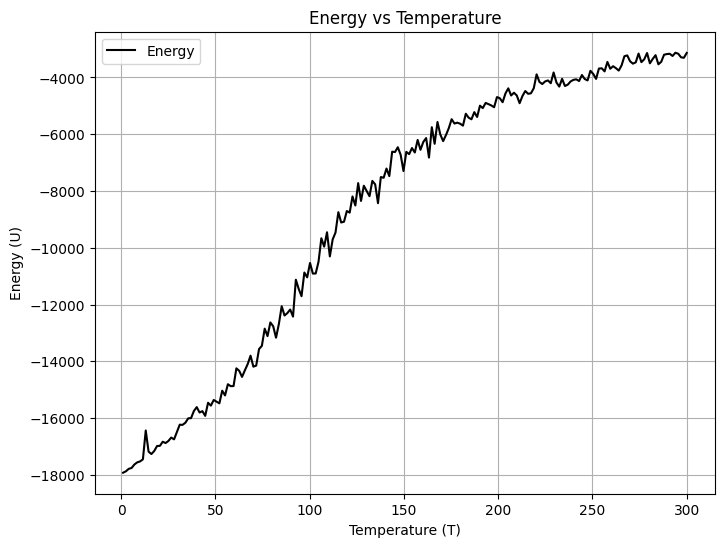

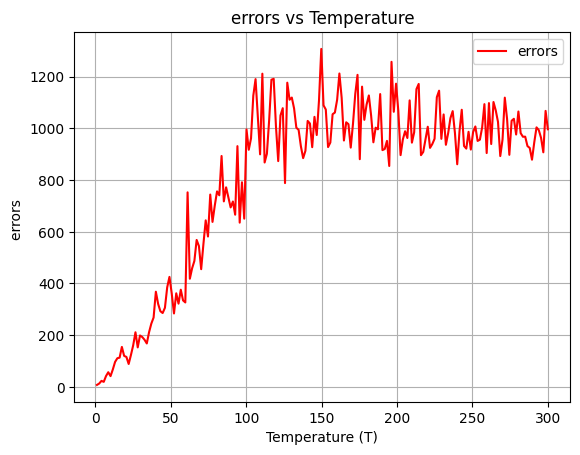

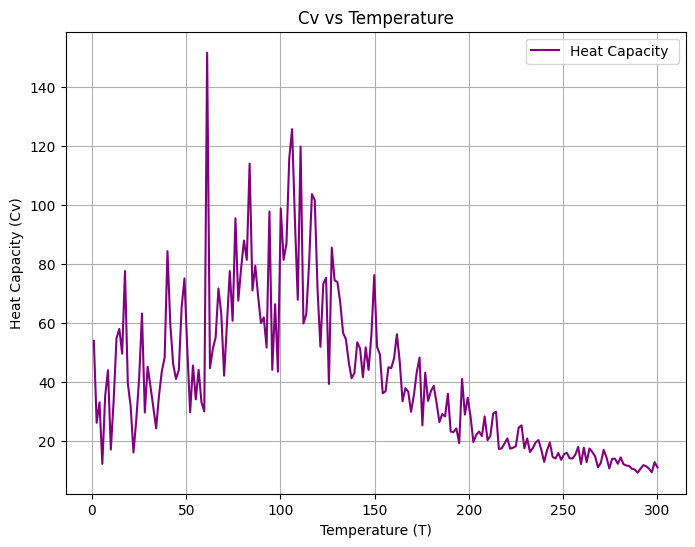

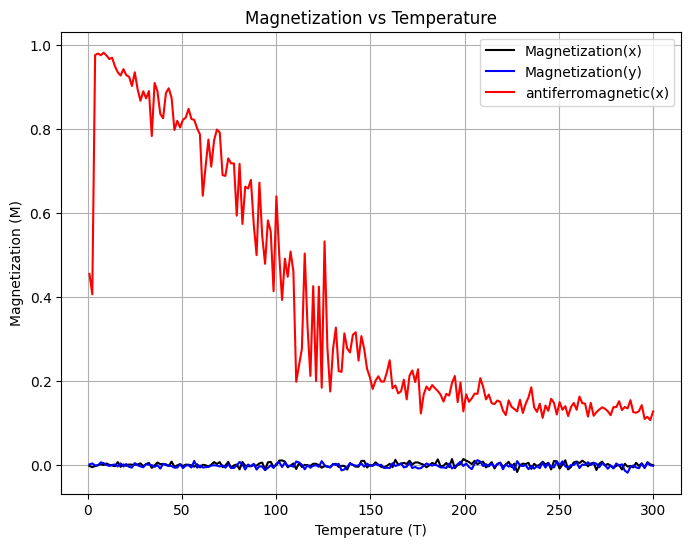

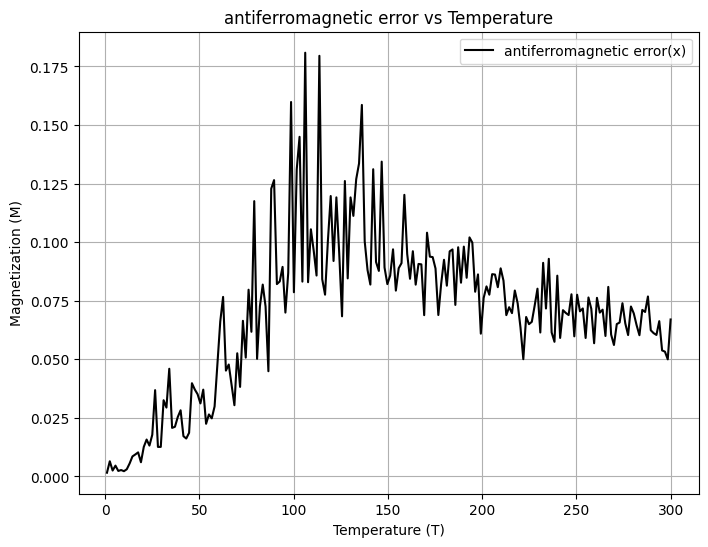

<ipython-input-17-b46e10d06211>:157: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


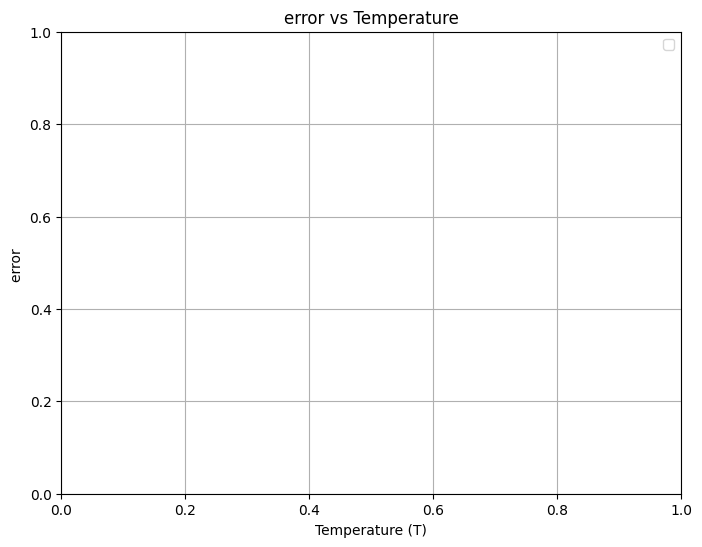

In [ ]:
##Heisenberg model#####
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def spin_matrix_2(N, J, H, T,steps):
    G = np.random.uniform(0, 2 * np.pi, (N, N))
    for _ in range(steps):
      n, m = np.random.randint(0, N), np.random.randint(0, N)
      s_n=np.random.uniform(0, 2 * np.pi)
      E0 = local_energy_2(n, m, G, J, H)
      original_spin = G[n, m]
      G[n, m] = s_n
      E1 = local_energy_2(n, m, G, J, H)
      delta_E = E1 - E0
      p = np.random.rand()
      if p> np.exp(-delta_E/T):
        G[n, m] = original_spin
    return G

def local_energy_2(n, m, G, J, H):
    N = G.shape[0]
    s_nm = G[n, m]
    neighbors = []
    if n + 1 < N: neighbors.append(np.cos(s_nm-G[n + 1, m]))
    if n - 1 >= 0: neighbors.append(np.cos(s_nm-G[n - 1, m]))
    if m + 1 < N: neighbors.append(np.cos(s_nm-G[n, m + 1]))
    if m - 1 >= 0: neighbors.append(np.cos(s_nm-G[n, m - 1]))
    E_local = J * sum(neighbors) + H [0]*np.cos(s_nm-H[1])
    return E_local

def calculate_energy_2(G, J, H):
    N = G.shape[0]
    energy1= 0
    energy2= 0
    for i in range(N):
        for j in range(N):
            s_ij = G[i, j]
            energy2 += np.cos(s_ij -H[1])
            if i < N - 1:
                energy1 += np.cos(s_ij -G[i + 1, j])
            if j < N - 1:
                energy1 += np.cos(s_ij-G[i, j + 1])
    total_energy = +J * energy1 + H[1]*energy2
    return total_energy




def vec_energy_2(N, J, H, T, steps, avg_steps):
    G = spin_matrix_2(N, J, H, T, steps)
    eng_values = []
    for _ in range(avg_steps):
        eng_values.append(calculate_energy_2(G, J, H))
        n, m = np.random.randint(0, N), np.random.randint(0, N)
        s_n=np.random.uniform(0, 2 * np.pi)
        E0 = local_energy_2(n, m, G, J, H)
        original_spin = G[n, m]
        G[n, m] = s_n
        E1 = local_energy_2(n, m, G, J, H)
        delta_E = E1 - E0
        p = np.random.rand()
        if p> np.exp(-delta_E/T):
         G[n, m] = original_spin
    return eng_values

def antiferromagnetic_order(G):
    N = G.shape[0]
    i, j = np.indices(G.shape)
    antiMy = np.sum(np.sin(G) * (-1) ** (i + j)) / (N * N)
    antiMx = np.sum(np.cos(G) * (-1) ** (i + j)) / (N * N)
    AM=np.sqrt(antiMy**2+antiMx**2)
    return AM

def magnetizaicion_y_of_matrix(G):
  N = G.shape[0]
  My = -np.sum(np.sin(G)) / (N * N)
  return My
def magnetizaicion_x_of_matrix(G):
  N = G.shape[0]
  Mx = -np.sum(np.cos(G)) / (N * N)
  return Mx


def vec_magnetization_2(N, J, H, T, steps, avg_steps):
    G = spin_matrix_2(N, J, H, T, steps)
    magx_values = []
    magy_values = []
    antimag_values = []
    for _ in range(avg_steps):
        magx_values.append(magnetizaicion_x_of_matrix(G))
        magy_values.append(magnetizaicion_y_of_matrix(G))
        antimag_values.append(antiferromagnetic_order(G))
        n, m = np.random.randint(0, N), np.random.randint(0, N)
        s_n=np.random.uniform(0, 2 * np.pi)
        E0 = local_energy_2(n, m, G, J, H)
        original_spin = G[n, m]
        G[n, m] = s_n
        E1 = local_energy_2(n, m, G, J, H)
        delta_E = E1 - E0
        p = np.random.rand()
        if p> np.exp(-delta_E/T):
         G[n, m] = original_spin
    return magx_values,magy_values,antimag_values


def magnetization_vs_temperature_2(N, J, H, T_values, steps, avg_steps):
    magnetizationsx = []
    magnetizationsy = []
    antimagnetizations = []
    errorsam = []
    errorsy = []

    for T in T_values:
            (VMx,VMy,AVM)=vec_magnetization_2(N, J, H, T, steps, avg_steps)
            Mx = np.mean(VMx)
            My=np.mean(VMy)
            AM=np.mean(AVM)
            errorx = np.std(VMx)
            errory = np.std(VMy)
            erroam=np.std(AVM)
            magnetizationsx.append(Mx)
            magnetizationsy.append(My)
            antimagnetizations.append(AM)
            errorsam.append(erroam)
            errorsy.append(errory)

    plt.figure(figsize=(8,6))

    plt.plot(T_values, magnetizationsx, linestyle='solid', color='black', label="Magnetization(x)")
    plt.plot(T_values, magnetizationsy, linestyle='solid', color='blue', label="Magnetization(y)")
    plt.plot(T_values, antimagnetizations, linestyle='solid', color='red', label="antiferromagnetic(x)")

    plt.xlabel("Temperature (T)")
    plt.ylabel("Magnetization (M)")
    plt.title("Magnetization vs Temperature")
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(8,6))
    plt.plot(T_values, errorsam, linestyle='solid', color='black', label="antiferromagnetic error(x)")
    plt.xlabel("Temperature (T)")
    plt.ylabel("Magnetization (M)")
    plt.title("antiferromagnetic error vs Temperature")
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(8,6))
    plt.xlabel("Temperature (T)")
    plt.ylabel("error ")
    plt.title("error vs Temperature")
    plt.legend()
    plt.grid()
    plt.show()



def U_vs_T_2(N, J, H, T_values, steps, avg_steps):
    U = []
    errors = []
    Cv= []

    for T in T_values:
        UV=vec_energy_2(N, J, H, T, steps, avg_steps)
        mean_U = np.mean(UV)
        error_U = np.std(UV)
        U.append(mean_U)
        errors.append(error_U)
        Cv.append((np.var(UV,ddof=1)/((T**2))))



    plt.figure(figsize=(8,6))
    plt.plot(T_values, U, linestyle='solid', color='black', label="Energy")
    plt.xlabel("Temperature (T)")
    plt.ylabel("Energy (U)")
    plt.title("Energy vs Temperature")
    plt.legend()
    plt.grid()
    plt.show()


    plt.plot(T_values, errors, linestyle='solid', color='red', label="errors")
    plt.xlabel("Temperature (T)")
    plt.ylabel("errors ")
    plt.title("errors vs Temperature")
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(T_values, Cv, linestyle='solid', color='purple', label="Heat Capacity ")
    plt.xlabel("Temperature (T)")
    plt.ylabel("Heat Capacity (Cv)")
    plt.title("Cv vs Temperature")
    plt.legend()
    plt.grid(True)
    plt.show()



In [1]:

###מטריצת מודל איזנברג##
import numpy as np
import matplotlib.pyplot as plt

def plot_spin_matrix(G):
    plt.figure(figsize=(6, 6))

    X, Y = np.meshgrid(np.arange(G.shape[1]), np.arange(G.shape[0]))

    U = np.cos(G)
    V = np.sin(G)
    plt.quiver(X, Y, U, V, scale=20, headwidth=3, headlength=5, color='blue')

    plt.xticks([])
    plt.yticks([])
    plt.title("Spin Configuration")
    plt.show()

A=spin_matrix_2(10, 100, [1,0], 100,100000)
plot_spin_matrix(A)
print(antiferromagnetic_order(A))



NameError: name 'spin_matrix_2' is not defined